In [664]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import pandas as pd
from matplotlib import pyplot as pt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

# Exercice 2

In [665]:
df=pd.read_csv("diabetes.csv")
X=df['Glucose']
y=df['Outcome']
X

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [666]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

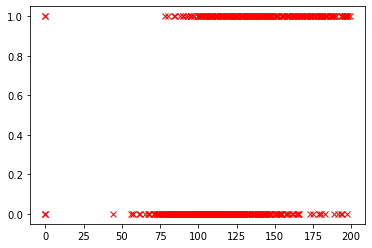

In [667]:
pt.plot(X,y,"rx")

In [668]:
#2-c- conslusion : on conclut qu'il y'a des bruits

In [669]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [670]:
#2-e-
#lorsqu'on sépare les données en données d'apprentissage et en données de tests, 
#la plupart des données sont utilisées pour l'apprentissage et une plus petite partie des données est utilisée pour 
#les tests.

In [671]:
#2-f-
len(X_train), len(X_test)

(614, 154)

# Model

In [672]:
#3-
h=LogisticRegression(solver='liblinear',random_state=0)
X=np.array(X).reshape(-1,1)
h.fit(X,y)

LogisticRegression(random_state=0, solver='liblinear')

In [673]:
w0,w1=h.intercept_,h.coef_
w0,w1

(array([-4.59756449]), array([[0.03218157]]))

In [674]:
L1=np.linspace(0.1,0.9,5000)
L1

array([0.1       , 0.10016003, 0.10032006, ..., 0.89967994, 0.89983997,
       0.9       ])

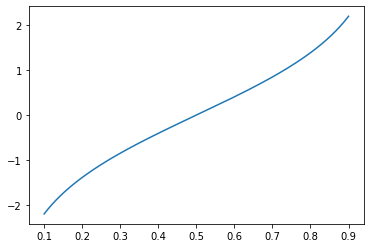

In [675]:
def Logit(X):
    return np.log(X/(1-X))

pt.plot(L1,Logit(L1))

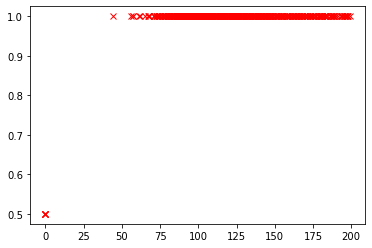

In [676]:
def Sigmoid(X):
    return 1/(1+np.exp(-X))

pt.plot(X,Sigmoid(X),"rx")

In [677]:
h.predict([[197]])

array([1], dtype=int64)

In [678]:
def model(X):
    return (1/(1+np.exp(-w0-w1*X)))

model(X)

array([[0.54123309],
       [0.13445485],
       [0.78442849],
       [0.15015258],
       [0.45296709],
       [0.29639951],
       [0.11032732],
       [0.28973241],
       [0.85096688],
       [0.36011425],
       [0.25776992],
       [0.6918834 ],
       [0.46895839],
       [0.81528929],
       [0.67799569],
       [0.20110417],
       [0.30999572],
       [0.23973433],
       [0.2170633 ],
       [0.28973241],
       [0.3675628 ],
       [0.19598353],
       [0.84683928],
       [0.31692105],
       [0.50109998],
       [0.36011425],
       [0.53323248],
       [0.18603958],
       [0.517184  ],
       [0.30315456],
       [0.25166094],
       [0.61942856],
       [0.14609206],
       [0.16289276],
       [0.33818051],
       [0.2170633 ],
       [0.46095269],
       [0.21164395],
       [0.15430557],
       [0.26397488],
       [0.76765516],
       [0.42130567],
       [0.23391808],
       [0.71207513],
       [0.62698525],
       [0.76765516],
       [0.52521475],
       [0.090

In [679]:
model([[197]])

array([[0.85096688]])

In [680]:
# Le personne ayant un glucose 197 appartient à la classe 1

In [681]:
model([[110],[139],[100],[84],[44]])

array([[0.25776992],
       [0.46895839],
       [0.20110417],
       [0.13075352],
       [0.03986499]])

In [682]:
# tous ces personnes appartiennent à la casse 0

In [683]:
# verification
h.predict([[110],[139],[100],[84],[44]])

array([0, 0, 0, 0, 0], dtype=int64)

In [684]:
#4
#4-a- la matrice de confusion est une matrice qui mesure la qualité d'un système de classification. 
# Chaque ligne correspond à une classe réelle, chaque colonne correspond à une classe estimée.
# en cas de d’une classification binaire :  FP, TP, FN, TN
# en cas d’une multinomial classification : plus que 4 elements

In [685]:
# True negatives: réalité= 0 et la prédiction= 0
# True positives:  réalité= 1 et la prédiction= 1
# False negatives: réalité= 1 et la prédiction= 0
# False positives:  réalité= 0 et la prédiction= 1

In [686]:
y_true=[0,0,0,0,1,1,1,1,1,1]
y_pred=[0,0,0,1,1,0,1,1,0,1]

In [687]:
confusion_matrix(y_true, y_pred)

array([[3, 1],
       [2, 4]], dtype=int64)

In [688]:
def matrice_confusion(y_true, y_pred):
    matrice=[[0,0],[0,0]]
    for i,j in zip(y_true,y_pred):
        if i==0 and j==0:
            matrice[0][0]+=1
        elif i==0 and j==1:
            matrice[0][1]+=1
        elif i==1 and j==0:
            matrice[1][0]+=1
        else:
            matrice[1][1]+=1
    
    return np.array(matrice)

matrice_confusion(y_true,y_pred)

array([[3, 1],
       [2, 4]])

In [689]:
y=np.array(y_test).reshape(-1,1)
matrice_confusion(y,h.predict(y))

array([[99,  0],
       [55,  0]])

In [690]:
matrix=confusion_matrix(y, h.predict(y))

matrix2=confusion_matrix(y_true, y_pred)
matrix2

array([[3, 1],
       [2, 4]], dtype=int64)

In [691]:
# accuracy metric
def accuracy(matrix):
    return (matrix[0][0]+matrix[1][1])/(np.sum(matrix))

accuracy(matrix)

0.6428571428571429

In [692]:
accuracy(matrix2)

0.7

In [693]:
accuracy_score(y,h.predict(y))

0.6428571428571429

In [694]:
# 𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛
def 𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛(matrix):
    return matrix[1][1]/(matrix[0][1]+matrix[1][1])

pression=𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛(matrix)
pression

<ipython-input-694-7984f5c15b13>:3: RuntimeWarning: invalid value encountered in longlong_scalars
  return matrix[1][1]/(matrix[0][1]+matrix[1][1])


nan

In [695]:
pression2=𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛(matrix2)
pression2

0.8

In [696]:
# recall
def recall(matrix):
    x=matrix[1][1]/(matrix[1][0]+matrix[1][1])
    return x

rec=recall(matrix)

In [697]:
rec2=recall(matrix2)

In [698]:
def f1score(pression, recall):
    x=2.*(pression*recall)/(pression+recall)
    return x

f1score(pression,rec)

nan

In [699]:
f1score(pression2,rec2)

0.7272727272727272

In [700]:
y=[[i] for i in y_test]
precision_recall_fscore_support(y, h.predict(y), average=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.64285714, 0.        ]),
 array([1., 0.]),
 array([0.7826087, 0.       ]),
 array([99, 55], dtype=int64))

In [701]:
#program 1
X=np.array([0,1,2,3,4,5,6,7,8,9])
y=np.array([0,1,2,3,4,5,6,7,8,9])

def gradientDescent(X,y): 
    n_samples=len(y) 
    learning_rate=0.001 
    n_iterations=2
    bias=0
    w=0 #ligne 6 
    for _ in range(n_iterations): 
        y_predicted=w*X+bias #ligne 8
        d_w=(2/n_samples)*np.sum(X*(y_predicted-y)) #ligne 9
        d_bias=(2/n_samples)*np.sum( (y_predicted-y)) #ligne 10
        w=w- learning_rate*d_w #ligne 11
        bias=bias-learning_rate*d_bias #ligne 12
    print(d_w," ",d_bias)
    return bias,w 

biais,w=gradientDescent(X,y)
biais,w

-53.67000000000001   -8.469000000000001


(0.017469000000000002, 0.11067000000000002)

# Exercice 4

In [702]:
df=pd.read_csv("diabetes.csv")
X=df['Glucose']
y=df['Outcome']
X=[[i] for i in X]
X=np.array(X)

def gradientDescent(X,y): 
    n_samples,n_features=X.shape 
    learning_rate=0.001 
    n_iterations=100 
    bias=0
    W=np.zeros(n_features) #ligne 6 
    for _ in range(n_iterations): 
        y_predicted=np.dot(X,W)+bias #ligne 8 
        d_W=(2/n_samples)*np.dot(X.T,(y_predicted-y)) #ligne 9 
        d_bias=(2/n_samples)*np.sum(y_predicted-y) #ligne 10 
        W-= learning_rate *d_W #ligne 11
        bias-= learning_rate *d_bias #ligne 12 
    
    return bias,W

#modification?

In [703]:
gradientDescent(X,y)

(-3.1249756748674015e+143, array([-4.04180244e+145]))

In [704]:
# 3- Que représente le vecteur retourné par sigmoid ?
# il represente la probabilité de le vecteur des features
# 4- Que représente LinearModel, le paramètre de la fonction sigmoid
# il repersente la regression linéaire
# 5- Ajouter une fonction Predict (bias, W, X) permettant de retourner les classes des lignes de X
def predict(w0,w1,X):
    linear_model=np.dot(X,w1)+w0
    y_predicted=Sigmoid(linear_model)
    y_predicted_cls=[1 if i>0.5 else 0 for i in y_predicted]
    return y_predicted_cls

predict(w0,w1,X)

[1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,


# Exercice 5

In [705]:
X=df[['Glucose','BloodPressure','SkinThickness']]
y=df['Outcome']

In [706]:
df['Glucose'].max(),df['BloodPressure'].max(),df['SkinThickness'].max()

(199, 122, 99)

In [707]:
df['Glucose'].min(),df['BloodPressure'].min(),df['SkinThickness'].min()

(0, 0, 0)

In [708]:
df['Glucose'].mean(),df['BloodPressure'].mean(),df['SkinThickness'].mean()

(120.89453125, 69.10546875, 20.536458333333332)

In [709]:
#modification
def gradientDescent(X,y): 
    n_samples,n_features=X.shape 
    learning_rate=0.001 
    n_iterations=1000
    bias=0
    W=np.zeros(n_features) #ligne 6 
    for _ in range(n_iterations): 
        linearModel=np.dot(X,W)+bias
        y_predicted=Sigmoid(linearModel) #ligne 8 
        d_W=(2/n_samples)*np.dot(X.T,(y_predicted-y)) #ligne 9 
        d_bias=(2/n_samples)*np.sum(y_predicted-y) #ligne 10 
        W-= learning_rate *d_W #ligne 11
        bias-= learning_rate *d_bias #ligne 12
    
    return bias,W
# taille de W est 3
# Pour un nombre d’itération 1000 et un learning_rate=0.0001, 
# écrire l’expression de la fonction logit et l’expression de la fonction logistique ?
gradientDescent(X,y)

(-0.06989429118855951, array([ 0.05860127, -0.11197141,  0.00672397]))

In [710]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [711]:
h.fit(X,y)
h.intercept_,h.coef_

(array([-4.3567595]), array([[ 0.03310054, -0.0070584 ,  0.00640522]]))

In [712]:
# comparaison? ==> le modèle de sklearn est plus perfermant à cause que notre algorithme de gradient descente n'a pas attendre
# la valeur optimale en fonction de le nombre d'itération et le degré d'apprentissage

In [713]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=12)
def gradientDescent(X,y): 
    n_samples,n_features=X.shape
    #print(X.shape)
    learning_rate=0.00001 
    n_iterations=2
    bias=0
    W=np.zeros(n_features) #ligne 6 => [0,0,0]
    for _ in range(n_iterations): 
        y_predicted=np.dot(X,W)+bias #ligne 8 
        #print(y_predicted.shape, y_predicted)
        d_W=(2/n_samples)*np.dot(X.T,(y_predicted-y)) #ligne 9 
        d_bias=(2/n_samples)*np.sum(y_predicted-y) #ligne 10 
        W-= learning_rate *d_W #ligne 11
        bias-= learning_rate *d_bias #ligne 12
    
    return bias,W
    
b,W=gradientDescent(X_train,y_train)
b,W

(1.0767535189763289e-05, array([0.0015677 , 0.0007619 , 0.00023973]))